In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.resnet50 import ResNet50

#Import from notebook

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
%cd '/content/drive/My Drive/Colab Notebooks'

/content/drive/My Drive/Colab Notebooks


In [0]:
!pip install import-ipynb

In [0]:
import import_ipynb
import MRNet_models_processing as processing

importing Jupyter notebook from MRNet_models_processing.ipynb


Using TensorFlow backend.


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
unzip:  cannot find or open /content/drive/My Drive/MRNET data set/MRNet-v1.0.zip, /content/drive/My Drive/MRNET data set/MRNet-v1.0.zip.zip or /content/drive/My Drive/MRNET data set/MRNet-v1.0.zip.ZIP.


#Extractor (ResNet)

In [0]:
extractor_res = ResNet50(weights='imagenet' , input_shape=(256,256,3) , include_top = False)
extractor_res.compile(loss='binary_crossentropy',optimizer = keras.optimizers.Adam(1e-4),metrics=['acc'])

In [0]:
extractor_dense.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

#Train Classifiers

##Binary Classifier

In [0]:
def binary_classifier():  
  binary_class = keras.models.Sequential()
  binary_class.add(keras.layers.Dense(units=512 , activation = 'relu' , input_dim = 2048 ))
  binary_class.add(keras.layers.Dense(units=256 , activation = 'relu'))
  binary_class.add(keras.layers.Dense(units=1 , activation = 'sigmoid'))
  
  binary_class.compile(loss='binary_crossentropy',optimizer = keras.optimizers.Adam(1e-5),metrics=['acc'])
  return binary_class

## test classifiers

###test 1

Epoch 1/50
42/51 [=======================>......] - ETA: 0s - loss: 0.4941 - acc: 0.7952
Epoch 00001: val_acc improved from -inf to 0.82301, saving model to /content/drive/My Drive/Models/trans_ResNet/Classifier/axial_abnormal.h5
51/51 [==============================] - 2s 47ms/step - loss: 0.4768 - acc: 0.7994 - val_loss: 0.4021 - val_acc: 0.8230
Epoch 2/50
42/51 [=======================>......] - ETA: 0s - loss: 0.3823 - acc: 0.8238
Epoch 00002: val_acc improved from 0.82301 to 0.83186, saving model to /content/drive/My Drive/Models/trans_ResNet/Classifier/axial_abnormal.h5
51/51 [==============================] - 0s 5ms/step - loss: 0.3823 - acc: 0.8230 - val_loss: 0.3746 - val_acc: 0.8319
Epoch 3/50
44/51 [========================>.....] - ETA: 0s - loss: 0.3486 - acc: 0.8432
Epoch 00003: val_acc did not improve from 0.83186
51/51 [==============================] - 0s 3ms/step - loss: 0.3529 - acc: 0.8427 - val_loss: 0.3614 - val_acc: 0.8230
Epoch 4/50
43/51 [======================

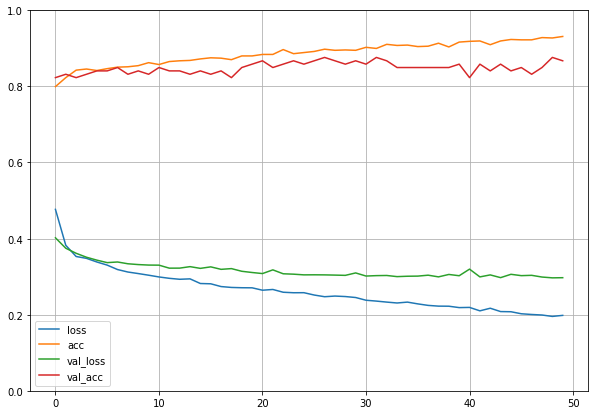

In [0]:
# neurons 512 then 256 and no dropouts
bin_class = binary_classifier()
processing.train_classifier(extractor_res , bin_class , processing.trans_resnet , processing.axial , processing.abnormal )

### test 2

Epoch 1/50
49/51 [===========================>..] - ETA: 0s - loss: 0.5625 - acc: 0.7765
Epoch 00001: val_acc improved from -inf to 0.84956, saving model to /content/drive/My Drive/Models/trans_ResNet/Classifier/axial_acl.h5
51/51 [==============================] - 1s 20ms/step - loss: 0.5525 - acc: 0.7807 - val_loss: 0.4324 - val_acc: 0.8496
Epoch 2/50
38/51 [=====================>........] - ETA: 0s - loss: 0.4441 - acc: 0.8105
Epoch 00002: val_acc did not improve from 0.84956
51/51 [==============================] - 0s 3ms/step - loss: 0.4413 - acc: 0.8161 - val_loss: 0.4260 - val_acc: 0.8407
Epoch 3/50
41/51 [=======================>......] - ETA: 0s - loss: 0.4149 - acc: 0.8378
Epoch 00003: val_acc did not improve from 0.84956
51/51 [==============================] - 0s 3ms/step - loss: 0.4047 - acc: 0.8378 - val_loss: 0.4996 - val_acc: 0.7699
Epoch 4/50
42/51 [=======================>......] - ETA: 0s - loss: 0.3620 - acc: 0.8512
Epoch 00004: val_acc did not improve from 0.84956


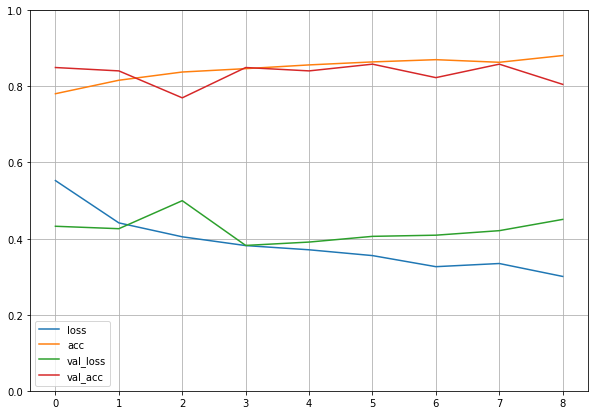

In [0]:
#lr = 0.0001 for axial acl
bin_class = binary_classifier()
processing.train_classifier(extractor_res , bin_class , processing.trans_resnet , processing.axial , processing.acl )

In [0]:
processing.test_classifier(extractor_res, processing.load_model(processing.trans_resnet,processing.axial,processing.acl,processing.classifier ) ,processing.axial , processing.acl)

4/4 [==============================] - 0s 4ms/step - loss: 0.7649 - acc: 0.6250


[0.7648979425430298, 0.625]

###test 3

Epoch 1/50
39/51 [=====================>........] - ETA: 0s - loss: 0.9569 - acc: 0.7295
Epoch 00001: val_acc improved from -inf to 0.80531, saving model to /content/drive/My Drive/Models/trans_ResNet/Classifier/axial_abnormal.h5
51/51 [==============================] - 2s 41ms/step - loss: 0.9267 - acc: 0.7286 - val_loss: 0.4965 - val_acc: 0.8053
Epoch 2/50
51/51 [==============================] - ETA: 0s - loss: 0.7439 - acc: 0.7394
Epoch 00002: val_acc did not improve from 0.80531
51/51 [==============================] - 0s 4ms/step - loss: 0.7439 - acc: 0.7394 - val_loss: 0.4693 - val_acc: 0.8053
Epoch 3/50
50/51 [============================>.] - ETA: 0s - loss: 0.6355 - acc: 0.7640
Epoch 00003: val_acc did not improve from 0.80531
51/51 [==============================] - 0s 4ms/step - loss: 0.6375 - acc: 0.7620 - val_loss: 0.4313 - val_acc: 0.7965
Epoch 4/50
40/51 [======================>.......] - ETA: 0s - loss: 0.6477 - acc: 0.7500
Epoch 00004: val_acc did not improve from 0.8

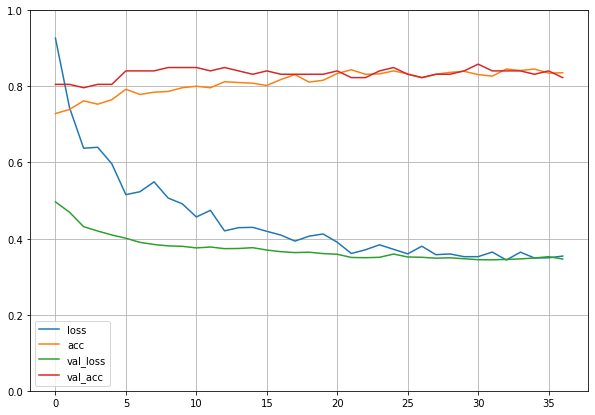

In [0]:
# neurons 512 then 256 and dropouts 0.5  lr_class = -5 
bin_class = binary_classifier()
processing.train_classifier(extractor_res , bin_class , processing.trans_resnet , processing.axial , processing.abnormal )

In [0]:
processing.test_classifier(extractor_res , processing.load_model(processing.trans_resnet,processing.axial,processing.abnormal,processing.classifier ) ,processing.axial , processing.abnormal )

4/4 [==============================] - 0s 3ms/step - loss: 0.4083 - acc: 0.8333


[0.4083431661128998, 0.8333333134651184]

## Axial Abnormal

Epoch 1/50
37/51 [====================>.........] - ETA: 0s - loss: 0.5044 - acc: 0.7851
Epoch 00001: val_acc improved from -inf to 0.79646, saving model to /content/drive/My Drive/Models/trans_ResNet/Classifier/axial_abnormal.h5
51/51 [==============================] - 1s 21ms/step - loss: 0.4783 - acc: 0.7965 - val_loss: 0.4487 - val_acc: 0.7965
Epoch 2/50
41/51 [=======================>......] - ETA: 0s - loss: 0.3768 - acc: 0.8329
Epoch 00002: val_acc improved from 0.79646 to 0.82301, saving model to /content/drive/My Drive/Models/trans_ResNet/Classifier/axial_abnormal.h5
51/51 [==============================] - 0s 8ms/step - loss: 0.3859 - acc: 0.8240 - val_loss: 0.4088 - val_acc: 0.8230
Epoch 3/50
43/51 [========================>.....] - ETA: 0s - loss: 0.3584 - acc: 0.8384
Epoch 00003: val_acc did not improve from 0.82301
51/51 [==============================] - 0s 3ms/step - loss: 0.3557 - acc: 0.8348 - val_loss: 0.3837 - val_acc: 0.8053
Epoch 4/50
42/51 [======================

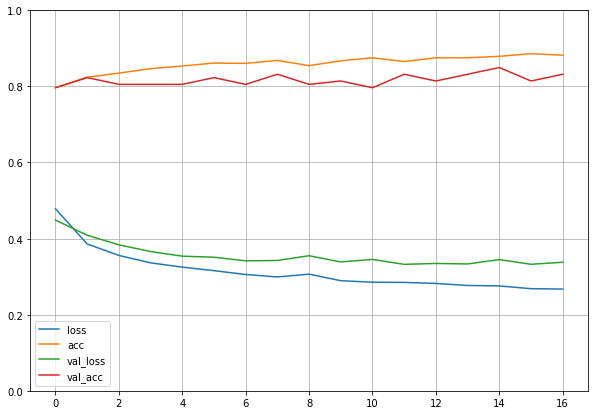

In [0]:
# neurons 512 then 256 and no dropouts  lr_class = -5 
bin_class = binary_classifier()
processing.train_classifier(extractor_res , bin_class , processing.trans_resnet , processing.axial , processing.abnormal )

In [0]:
processing.test_classifier(extractor_res , processing.load_model(processing.trans_resnet,processing.axial,processing.abnormal,processing.classifier ) ,processing.axial , processing.abnormal )

4/4 [==============================] - 0s 2ms/step - loss: 0.3410 - acc: 0.8500


[0.3409816324710846, 0.8500000238418579]

## Axial Acl

Epoch 1/50
42/51 [=======================>......] - ETA: 0s - loss: 0.5204 - acc: 0.8036
Epoch 00001: val_acc improved from -inf to 0.84956, saving model to /content/drive/My Drive/Models/trans_ResNet/Classifier/axial_acl.h5
51/51 [==============================] - 1s 21ms/step - loss: 0.5035 - acc: 0.8112 - val_loss: 0.4398 - val_acc: 0.8496
Epoch 2/50
43/51 [========================>.....] - ETA: 0s - loss: 0.4720 - acc: 0.8140
Epoch 00002: val_acc did not improve from 0.84956
51/51 [==============================] - 0s 3ms/step - loss: 0.4719 - acc: 0.8151 - val_loss: 0.4622 - val_acc: 0.8496
Epoch 3/50
39/51 [=====================>........] - ETA: 0s - loss: 0.4432 - acc: 0.8128
Epoch 00003: val_acc improved from 0.84956 to 0.85841, saving model to /content/drive/My Drive/Models/trans_ResNet/Classifier/axial_acl.h5
51/51 [==============================] - 0s 5ms/step - loss: 0.4408 - acc: 0.8151 - val_loss: 0.4376 - val_acc: 0.8584
Epoch 4/50
50/51 [============================>.] 

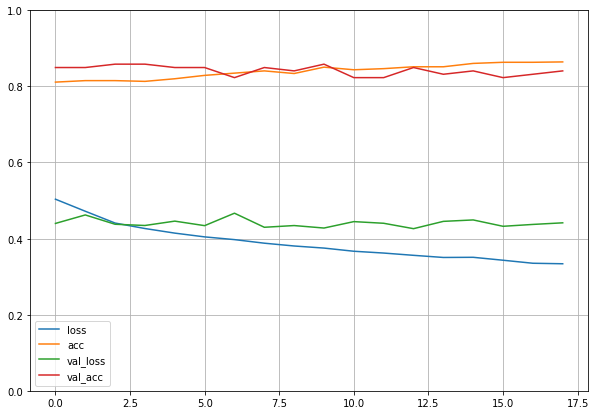

In [0]:
bin_class = binary_classifier()
processing.train_classifier(extractor_res , bin_class , processing.trans_resnet , processing.axial , processing.acl )

In [0]:
processing.test_classifier(extractor_res, processing.load_model(processing.trans_resnet,processing.axial,processing.acl,processing.classifier ) ,processing.axial , processing.acl)

4/4 [==============================] - 0s 3ms/step - loss: 0.8005 - acc: 0.5583


[0.8004680871963501, 0.5583333373069763]

## Axial Meniscal

Epoch 1/50
42/51 [=======================>......] - ETA: 0s - loss: 0.6454 - acc: 0.6107
Epoch 00001: val_acc improved from -inf to 0.67257, saving model to /content/drive/My Drive/Models/trans_ResNet/Classifier/axial_meniscus.h5
51/51 [==============================] - 0s 7ms/step - loss: 0.6323 - acc: 0.6234 - val_loss: 0.6068 - val_acc: 0.6726
Epoch 2/50
42/51 [=======================>......] - ETA: 0s - loss: 0.5825 - acc: 0.6821
Epoch 00002: val_acc improved from 0.67257 to 0.72566, saving model to /content/drive/My Drive/Models/trans_ResNet/Classifier/axial_meniscus.h5
51/51 [==============================] - 0s 5ms/step - loss: 0.5812 - acc: 0.6794 - val_loss: 0.5903 - val_acc: 0.7257
Epoch 3/50
43/51 [========================>.....] - ETA: 0s - loss: 0.5547 - acc: 0.6977
Epoch 00003: val_acc improved from 0.72566 to 0.73451, saving model to /content/drive/My Drive/Models/trans_ResNet/Classifier/axial_meniscus.h5
51/51 [==============================] - 0s 8ms/step - loss: 0.558

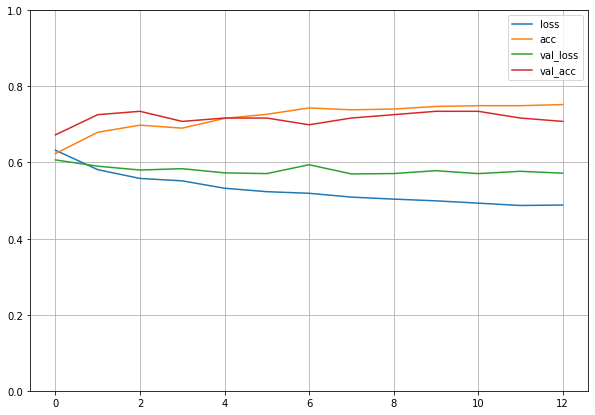

In [0]:
bin_class = binary_classifier()
processing.train_classifier(extractor_res , bin_class , processing.trans_resnet , processing.axial , processing.meniscal )

In [0]:
processing.test_classifier(extractor_res, processing.load_model(processing.trans_resnet,processing.axial,processing.meniscal,processing.classifier ) ,processing.axial , processing.meniscal)

4/4 [==============================] - 0s 2ms/step - loss: 0.6296 - acc: 0.6500


[0.6295508146286011, 0.6499999761581421]

## Saggital Abnormal

Epoch 1/50
38/51 [=====================>........] - ETA: 0s - loss: 0.6368 - acc: 0.6697
Epoch 00001: val_acc improved from -inf to 0.80531, saving model to /content/drive/My Drive/Models/trans_ResNet/Classifier/sagittal_abnormal.h5
51/51 [==============================] - 0s 7ms/step - loss: 0.5952 - acc: 0.7030 - val_loss: 0.4707 - val_acc: 0.8053
Epoch 2/50
37/51 [====================>.........] - ETA: 0s - loss: 0.4398 - acc: 0.8122
Epoch 00002: val_acc did not improve from 0.80531
51/51 [==============================] - 0s 3ms/step - loss: 0.4338 - acc: 0.8092 - val_loss: 0.4431 - val_acc: 0.7876
Epoch 3/50
49/51 [===========================>..] - ETA: 0s - loss: 0.4033 - acc: 0.8102
Epoch 00003: val_acc improved from 0.80531 to 0.81416, saving model to /content/drive/My Drive/Models/trans_ResNet/Classifier/sagittal_abnormal.h5
51/51 [==============================] - 0s 6ms/step - loss: 0.4015 - acc: 0.8112 - val_loss: 0.4367 - val_acc: 0.8142
Epoch 4/50
51/51 [=================

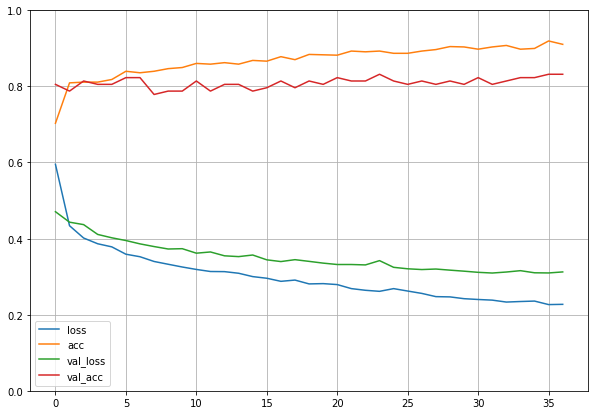

In [0]:
bin_class = binary_classifier()
processing.train_classifier(extractor_res , bin_class , processing.trans_resnet , processing.sagittal , processing.abnormal )

In [0]:
processing.test_classifier(extractor_res, processing.load_model(processing.trans_resnet,processing.sagittal,processing.abnormal,processing.classifier ) ,processing.sagittal , processing.abnormal)

4/4 [==============================] - 0s 2ms/step - loss: 0.3893 - acc: 0.8333


[0.3892797529697418, 0.8333333134651184]

## Saggital Acl

Epoch 1/50
51/51 [==============================] - ETA: 0s - loss: 0.5072 - acc: 0.8112
Epoch 00001: val_acc improved from -inf to 0.84956, saving model to /content/drive/My Drive/Models/trans_ResNet/Classifier/sagittal_acl.h5
51/51 [==============================] - 0s 7ms/step - loss: 0.5072 - acc: 0.8112 - val_loss: 0.4498 - val_acc: 0.8496
Epoch 2/50
41/51 [=======================>......] - ETA: 0s - loss: 0.4814 - acc: 0.8122
Epoch 00002: val_acc did not improve from 0.84956
51/51 [==============================] - 0s 3ms/step - loss: 0.4804 - acc: 0.8112 - val_loss: 0.4430 - val_acc: 0.8496
Epoch 3/50
42/51 [=======================>......] - ETA: 0s - loss: 0.4659 - acc: 0.8060
Epoch 00003: val_acc did not improve from 0.84956
51/51 [==============================] - 0s 3ms/step - loss: 0.4579 - acc: 0.8122 - val_loss: 0.4144 - val_acc: 0.8496
Epoch 4/50
39/51 [=====================>........] - ETA: 0s - loss: 0.4451 - acc: 0.8077
Epoch 00004: val_acc did not improve from 0.8495

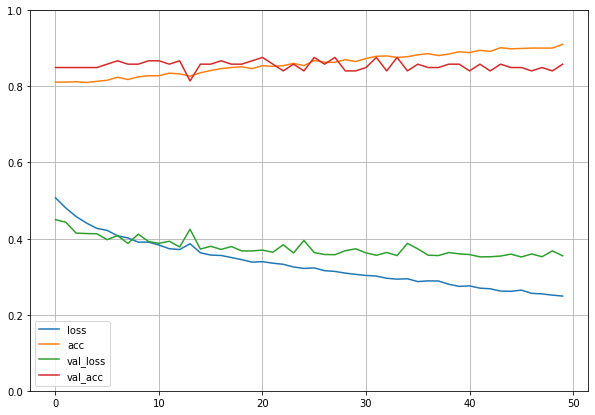

In [0]:
bin_class = binary_classifier()
processing.train_classifier(extractor_res , bin_class , processing.trans_resnet , processing.sagittal , processing.acl )

In [0]:
processing.test_classifier(extractor_res, processing.load_model(processing.trans_resnet,processing.sagittal,processing.acl,processing.classifier ) ,processing.sagittal , processing.acl)

4/4 [==============================] - 0s 3ms/step - loss: 0.6379 - acc: 0.7000


[0.6379034519195557, 0.699999988079071]

## Saggital Meniscal

Epoch 1/50
42/51 [=======================>......] - ETA: 0s - loss: 0.6893 - acc: 0.6452
Epoch 00001: val_acc improved from -inf to 0.62832, saving model to /content/drive/My Drive/Models/trans_ResNet/Classifier/sagittal_meniscus.h5
51/51 [==============================] - 0s 6ms/step - loss: 0.6828 - acc: 0.6352 - val_loss: 0.6777 - val_acc: 0.6283
Epoch 2/50
35/51 [===================>..........] - ETA: 0s - loss: 0.6168 - acc: 0.6671
Epoch 00002: val_acc improved from 0.62832 to 0.70796, saving model to /content/drive/My Drive/Models/trans_ResNet/Classifier/sagittal_meniscus.h5
51/51 [==============================] - 0s 6ms/step - loss: 0.6065 - acc: 0.6686 - val_loss: 0.6119 - val_acc: 0.7080
Epoch 3/50
50/51 [============================>.] - ETA: 0s - loss: 0.5797 - acc: 0.6890
Epoch 00003: val_acc did not improve from 0.70796
51/51 [==============================] - 0s 4ms/step - loss: 0.5835 - acc: 0.6844 - val_loss: 0.5965 - val_acc: 0.6903
Epoch 4/50
49/51 [=================

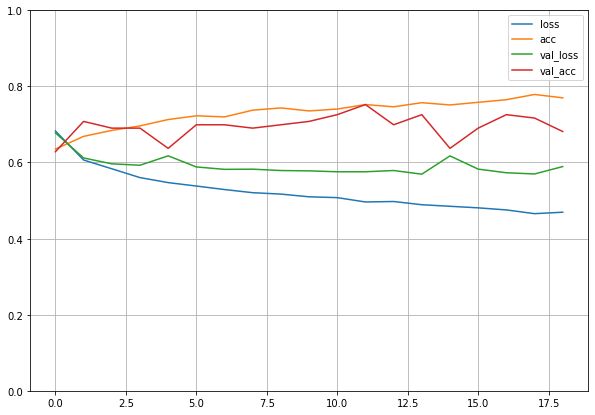

In [0]:
bin_class = binary_classifier()
processing.train_classifier(extractor_res , bin_class , processing.trans_resnet , processing.sagittal , processing.meniscal)

In [0]:
processing.test_classifier(extractor_res, processing.load_model(processing.trans_resnet,processing.sagittal,processing.meniscal,processing.classifier ) ,processing.sagittal , processing.meniscal)

4/4 [==============================] - 0s 3ms/step - loss: 0.6266 - acc: 0.6500


[0.6265714764595032, 0.6499999761581421]

## Coronal Abnormal

Epoch 1/50
40/51 [======================>.......] - ETA: 0s - loss: 0.5123 - acc: 0.7700
Epoch 00001: val_acc improved from -inf to 0.81416, saving model to /content/drive/My Drive/Models/trans_ResNet/Classifier/coronal_abnormal.h5
51/51 [==============================] - 0s 7ms/step - loss: 0.4968 - acc: 0.7797 - val_loss: 0.4790 - val_acc: 0.8142
Epoch 2/50
36/51 [====================>.........] - ETA: 0s - loss: 0.4486 - acc: 0.8097
Epoch 00002: val_acc improved from 0.81416 to 0.83186, saving model to /content/drive/My Drive/Models/trans_ResNet/Classifier/coronal_abnormal.h5
51/51 [==============================] - 0s 5ms/step - loss: 0.4268 - acc: 0.8161 - val_loss: 0.4594 - val_acc: 0.8319
Epoch 3/50
42/51 [=======================>......] - ETA: 0s - loss: 0.4108 - acc: 0.8167
Epoch 00003: val_acc did not improve from 0.83186
51/51 [==============================] - 0s 3ms/step - loss: 0.4042 - acc: 0.8181 - val_loss: 0.4457 - val_acc: 0.8319
Epoch 4/50
34/51 [===================

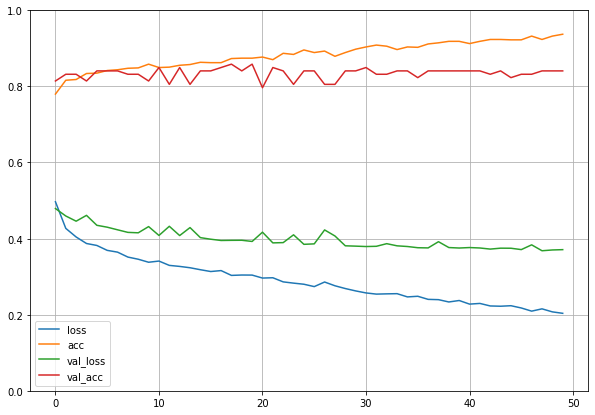

In [0]:
bin_class = binary_classifier()
processing.train_classifier(extractor_res , bin_class , processing.trans_resnet , processing.coronal , processing.abnormal )

In [0]:
processing.test_classifier(extractor_res, processing.load_model(processing.trans_resnet,processing.coronal,processing.abnormal,processing.classifier ) ,processing.coronal , processing.abnormal)

4/4 [==============================] - 0s 3ms/step - loss: 0.4217 - acc: 0.8167


[0.4216698706150055, 0.8166666626930237]

## Coronal Acl

Epoch 1/50
36/51 [====================>.........] - ETA: 0s - loss: 0.4789 - acc: 0.8181
Epoch 00001: val_acc improved from -inf to 0.82301, saving model to /content/drive/My Drive/Models/trans_ResNet/Classifier/coronal_acl.h5
51/51 [==============================] - 0s 7ms/step - loss: 0.4877 - acc: 0.8092 - val_loss: 0.4308 - val_acc: 0.8230
Epoch 2/50
41/51 [=======================>......] - ETA: 0s - loss: 0.4690 - acc: 0.8049
Epoch 00002: val_acc improved from 0.82301 to 0.84071, saving model to /content/drive/My Drive/Models/trans_ResNet/Classifier/coronal_acl.h5
51/51 [==============================] - 0s 5ms/step - loss: 0.4492 - acc: 0.8171 - val_loss: 0.4054 - val_acc: 0.8407
Epoch 3/50
50/51 [============================>.] - ETA: 0s - loss: 0.4329 - acc: 0.8210
Epoch 00003: val_acc did not improve from 0.84071
51/51 [==============================] - 0s 4ms/step - loss: 0.4348 - acc: 0.8191 - val_loss: 0.4031 - val_acc: 0.8319
Epoch 4/50
46/51 [==========================>..

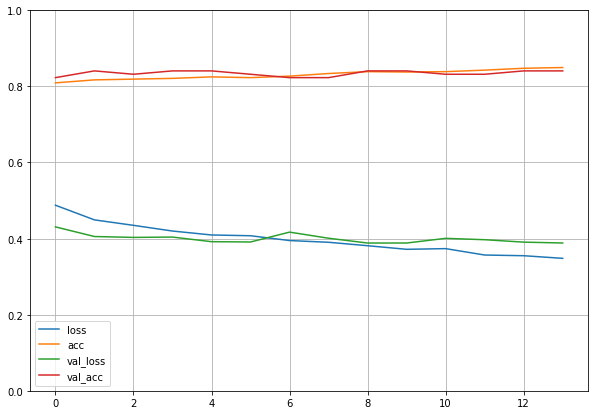

In [0]:
bin_class = binary_classifier()
processing.train_classifier(extractor_res , bin_class , processing.trans_resnet , processing.coronal , processing.acl )

In [0]:
processing.test_classifier(extractor_res, processing.load_model(processing.trans_resnet,processing.coronal,processing.acl,processing.classifier ) ,processing.coronal , processing.acl)

4/4 [==============================] - 0s 3ms/step - loss: 0.9154 - acc: 0.5500


[0.9154000878334045, 0.550000011920929]

## Coronal Meniscal

Epoch 1/50
49/51 [===========================>..] - ETA: 0s - loss: 0.6782 - acc: 0.6214
Epoch 00001: val_acc improved from -inf to 0.68142, saving model to /content/drive/My Drive/Models/trans_ResNet/Classifier/coronal_meniscus.h5
51/51 [==============================] - 0s 7ms/step - loss: 0.6737 - acc: 0.6264 - val_loss: 0.6257 - val_acc: 0.6814
Epoch 2/50
39/51 [=====================>........] - ETA: 0s - loss: 0.6160 - acc: 0.6603
Epoch 00002: val_acc did not improve from 0.68142
51/51 [==============================] - 0s 3ms/step - loss: 0.6056 - acc: 0.6726 - val_loss: 0.6070 - val_acc: 0.6637
Epoch 3/50
41/51 [=======================>......] - ETA: 0s - loss: 0.5769 - acc: 0.6890
Epoch 00003: val_acc improved from 0.68142 to 0.69912, saving model to /content/drive/My Drive/Models/trans_ResNet/Classifier/coronal_meniscus.h5
51/51 [==============================] - 0s 5ms/step - loss: 0.5777 - acc: 0.6932 - val_loss: 0.5950 - val_acc: 0.6991
Epoch 4/50
37/51 [===================

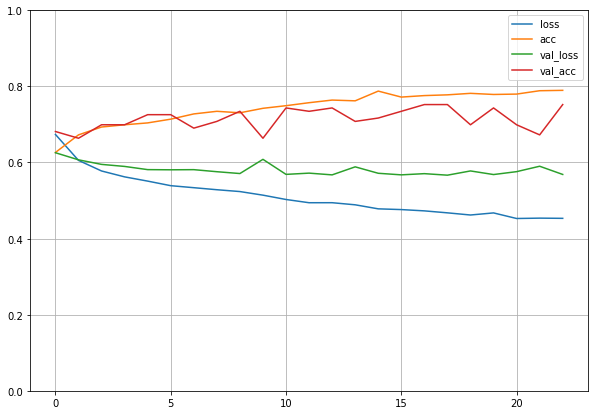

In [0]:
bin_class = binary_classifier()
processing.train_classifier(extractor_res , bin_class , processing.trans_resnet , processing.coronal , processing.meniscal)

In [0]:
processing.test_classifier(extractor_res, processing.load_model(processing.trans_resnet,processing.coronal,processing.meniscal,processing.classifier ) ,processing.coronal , processing.meniscal)

4/4 [==============================] - 0s 2ms/step - loss: 0.6235 - acc: 0.6500


[0.6234686970710754, 0.6499999761581421]

#Train Regressors

##Logistic Regressor

In [0]:
def regressor():  
  log_reg = keras.models.Sequential()
  log_reg.add(keras.layers.Dense(units=1 , activation = 'sigmoid' , input_dim = 3))
  log_reg.compile(loss='binary_crossentropy',optimizer = keras.optimizers.Adam(0.01),metrics=['acc'])
  return log_reg

###Abnormal

Epoch 1/50
47/51 [==========================>...] - ETA: 0s - loss: 0.4498 - acc: 0.8128
Epoch 00001: val_acc improved from -inf to 0.80531, saving model to /content/drive/My Drive/Models/trans_ResNet/Regressor/abnormal.h5
51/51 [==============================] - 0s 6ms/step - loss: 0.4508 - acc: 0.8083 - val_loss: 0.4353 - val_acc: 0.8053
Epoch 2/50
43/51 [========================>.....] - ETA: 0s - loss: 0.4055 - acc: 0.8035
Epoch 00002: val_acc did not improve from 0.80531
51/51 [==============================] - 0s 3ms/step - loss: 0.4004 - acc: 0.8083 - val_loss: 0.4268 - val_acc: 0.8053
Epoch 3/50
41/51 [=======================>......] - ETA: 0s - loss: 0.3928 - acc: 0.8061
Epoch 00003: val_acc did not improve from 0.80531
51/51 [==============================] - 0s 3ms/step - loss: 0.3871 - acc: 0.8083 - val_loss: 0.4171 - val_acc: 0.8053
Epoch 4/50
40/51 [======================>.......] - ETA: 0s - loss: 0.3677 - acc: 0.8188
Epoch 00004: val_acc did not improve from 0.80531
51/

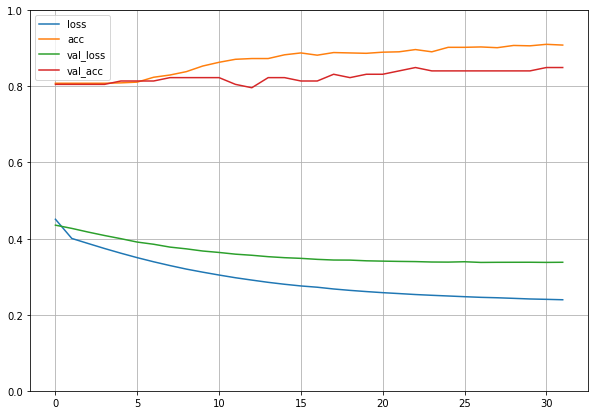

In [0]:
processing.train_regressor(regressor(),extractor_res,extractor_res,extractor_res,processing.trans_resnet,processing.abnormal)

In [0]:
processing.test_regressor(extractor_res,extractor_res,extractor_res,processing.trans_resnet,processing.abnormal)

4/4 [==============================] - 0s 3ms/step - loss: 0.3940 - acc: 0.8333


[0.39404281973838806, 0.8333333134651184]

###Acl

Epoch 1/50
47/51 [==========================>...] - ETA: 0s - loss: 0.6193 - acc: 0.8096
Epoch 00001: val_acc improved from -inf to 0.84956, saving model to /content/drive/My Drive/Models/trans_ResNet/Regressor/acl.h5
51/51 [==============================] - 0s 5ms/step - loss: 0.6137 - acc: 0.8122 - val_loss: 0.5283 - val_acc: 0.8496
Epoch 2/50
45/51 [=========================>....] - ETA: 0s - loss: 0.5472 - acc: 0.8122
Epoch 00002: val_acc did not improve from 0.84956
51/51 [==============================] - 0s 3ms/step - loss: 0.5459 - acc: 0.8122 - val_loss: 0.4780 - val_acc: 0.8496
Epoch 3/50
48/51 [===========================>..] - ETA: 0s - loss: 0.5166 - acc: 0.8094
Epoch 00003: val_acc did not improve from 0.84956
51/51 [==============================] - 0s 3ms/step - loss: 0.5128 - acc: 0.8122 - val_loss: 0.4558 - val_acc: 0.8496
Epoch 4/50
49/51 [===========================>..] - ETA: 0s - loss: 0.4918 - acc: 0.8112
Epoch 00004: val_acc did not improve from 0.84956
51/51 [=

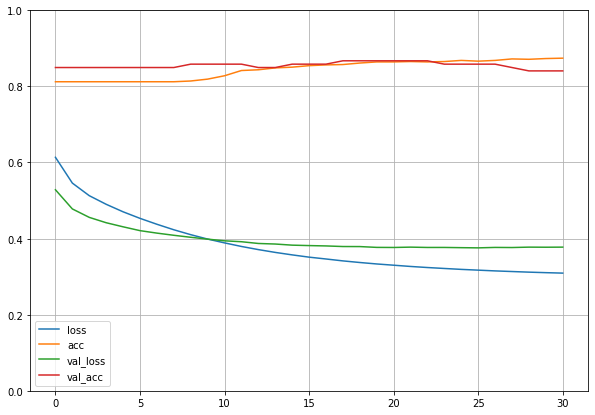

In [0]:
processing.train_regressor(regressor(),extractor_res,extractor_res,extractor_res,processing.trans_resnet,processing.acl)

In [0]:
processing.test_regressor(extractor_res,extractor_res,extractor_res,processing.trans_resnet,processing.acl)

4/4 [==============================] - 0s 3ms/step - loss: 0.6274 - acc: 0.6583


[0.6274384260177612, 0.6583333611488342]

###Meniscal

Epoch 1/50
48/51 [===========================>..] - ETA: 0s - loss: 0.6637 - acc: 0.6458
Epoch 00001: val_acc improved from -inf to 0.69027, saving model to /content/drive/My Drive/Models/trans_ResNet/Regressor/meniscus.h5
51/51 [==============================] - 0s 5ms/step - loss: 0.6617 - acc: 0.6500 - val_loss: 0.6437 - val_acc: 0.6903
Epoch 2/50
47/51 [==========================>...] - ETA: 0s - loss: 0.6187 - acc: 0.7181
Epoch 00002: val_acc improved from 0.69027 to 0.71681, saving model to /content/drive/My Drive/Models/trans_ResNet/Regressor/meniscus.h5
51/51 [==============================] - 0s 3ms/step - loss: 0.6168 - acc: 0.7217 - val_loss: 0.6184 - val_acc: 0.7168
Epoch 3/50
45/51 [=========================>....] - ETA: 0s - loss: 0.5847 - acc: 0.7589
Epoch 00003: val_acc improved from 0.71681 to 0.75221, saving model to /content/drive/My Drive/Models/trans_ResNet/Regressor/meniscus.h5
51/51 [==============================] - 0s 3ms/step - loss: 0.5839 - acc: 0.7552 - val

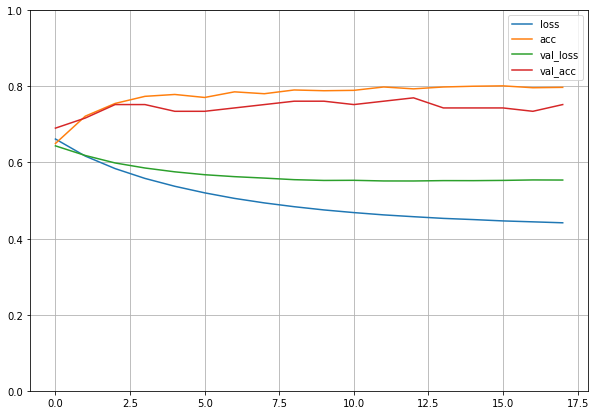

In [0]:
processing.train_regressor(regressor(),extractor_res,extractor_res,extractor_res,processing.trans_resnet,processing.meniscal)

In [0]:
processing.test_regressor(extractor_res,extractor_res,extractor_res,processing.trans_resnet,processing.meniscal)

4/4 [==============================] - 0s 2ms/step - loss: 0.5947 - acc: 0.7083


[0.5947383046150208, 0.7083333134651184]